# Dataset: Pittsburgh Police Arrest Data
## Data Source: https://data.wprdc.org/dataset/arrest-data
### Notebook authored by: Shinwoo Kim (`SHK148@pitt.edu`)

This Notebook will evalute Pittsburgh Police Arrest Data. The data is reported by the Pittsburgh Police Department and contains infomration on people taken into custody by City of Pittsburgh police officers.

Let us begin by importing the necessary libraries. We will use `numpy, pandas, seaborn, matplotlib, geopandas, descartes, shapely(part of geometry)`

In [1]:
# load numpy, pandas, seaborn, matplotlib, geopandas, descartes, geometry
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

Next, we will load the data ...

In [2]:
# load data from data set
arrests = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f") 

Let's take a peak at what our data looks like, and make our data useful. We'll abstract out the unnecessary details...

In [3]:
arrests.tail(3)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
51875,2042633,21190032,55.0,F,W,2021-10-16T17:21:00,"Industry ST & Millbridge ST Pittsburgh, PA 15210",1543 Driving While Operating Privilege is Susp...,"Industry ST & Millbridge ST Pittsburgh, PA 15210",Allentown,3,1803.0,3.0,5.0,-79.995799,40.420788
51876,2042634,21190032,33.0,M,W,2021-10-16T17:21:00,"Industry ST & Millbridge ST Pittsburgh, PA 15210",13(a)(32) Paraphernalia - Use or Possession,"Industry ST & Millbridge ST Pittsburgh, PA 15210",Allentown,3,1803.0,3.0,5.0,-79.995799,40.420788
51877,2042635,21190063,27.0,F,B,2021-10-16T17:34:00,"Cedar AV & Pressley ST Pittsburgh, PA 15212",3503.B1I DEF. TRESPASS ACTUAL COMMUNICATION,"300 Block Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.000908,40.450894


In [4]:
# Dropping unnecessary columns
arrests.drop(['INCIDENTZONE','INCIDENTTRACT', 'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION',], axis=1, inplace=True)

# Formatting arrest time properly
arrests['ARRESTTIME'] = pd.to_datetime(arrests['ARRESTTIME'])


arrests.head(3)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24 12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03 14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03 16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,-79.891803,40.486625


Much better! Let's take a look at what people are arrested for:

In [5]:
print (arrests["OFFENSES"].unique())

['3929 Retail Theft.' '13(a)(16) Possession of Controlled Substance'
 '5503 Disorderly Conduct. / 5505 Public Drunkenness' ...
 '3736 Reckless Driving / 13(a)(31) Marijuana: Possession Small Amount / 3802(c) DUI - Highest Rate of Alcohol - BAC >= .16%'
 '3702 Robbery of Motor Vehicle. / 2701(a)(1) Simple Assault - Intent., Know., Reckless.Cause Bod. Injury / 3921(a) Theft by Unlawful Taking or Disposition - Movable item / 2709(a)(4) Harassment Communicates Prohibited Acts / 2718(a)(1) Strangulation - Applying Pressure to the Throat or Neck'
 '1501 Drivers Required to be Licensed. / 3334 Turning Movements and Required Signals. / 13(a)(33) Paraphernalia - Delivery or Intent to Deliver']


Looks like people are often arrested for serious crimes(felonies) compared to minor/petty crimes(*e.g. loitering*). This suggests that **the neighborhood with the lowest amount of arrests is likely to be the safest neighborhood.**

Let's take a look at the types of people being arrested.

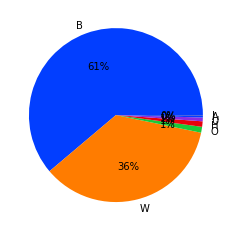

In [6]:
#By Race
data_copy = arrests.copy(deep=True)
Demo_Race = data_copy.groupby(by=['RACE'])['RACE'].count().reset_index(name='counts').sort_values(by='counts', ascending=False)
# Demo_Race

# Making a pie chart that shows demographics of those arrested

race = Demo_Race['RACE']
arrests = Demo_Race['counts']

labels = []
arrest_data = []


for item in race.iteritems():
    labels.append(item[1])
for item in arrests.iteritems():
    arrest_data.append(item[1])

# define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

# create pie chart
plt.pie(arrest_data, labels = labels , colors = colors, autopct='%.0f%%')

plt.show()

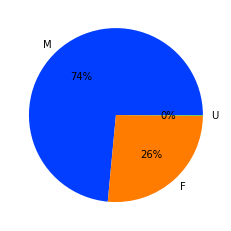

In [7]:
#By Gender
arrests = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
data_copy2 = arrests.copy()
Demo_Gender = data_copy2.groupby(by=['GENDER'])['GENDER'].count().reset_index(name='counts').sort_values(by='counts', ascending=False)

# Making a pie chart that shows demographics of those arrested

race = Demo_Gender['GENDER']
arrests = Demo_Gender['counts']

labels = []
arrest_data = []


for item in race.iteritems():
    labels.append(item[1])
for item in arrests.iteritems():
    arrest_data.append(item[1])

# define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

# create pie chart
plt.pie(arrest_data, labels = labels , colors = colors, autopct='%.0f%%')

plt.show()

Interesting(_not really_). Of the people arrested in Pittsburgh, 61% were black, even though they make up only ~25% of the population. *Ahem. Racial Bias??* Same for Gender; 74% were male, even though pittsburgh's gender demographics is split relatively evenly(Male 47: Female 52) 

---

Ok, back to the task at hand...Let's look at which neighborhoods have the most & least amount of arrests. We'll begin by plotting each arrest onto the map.

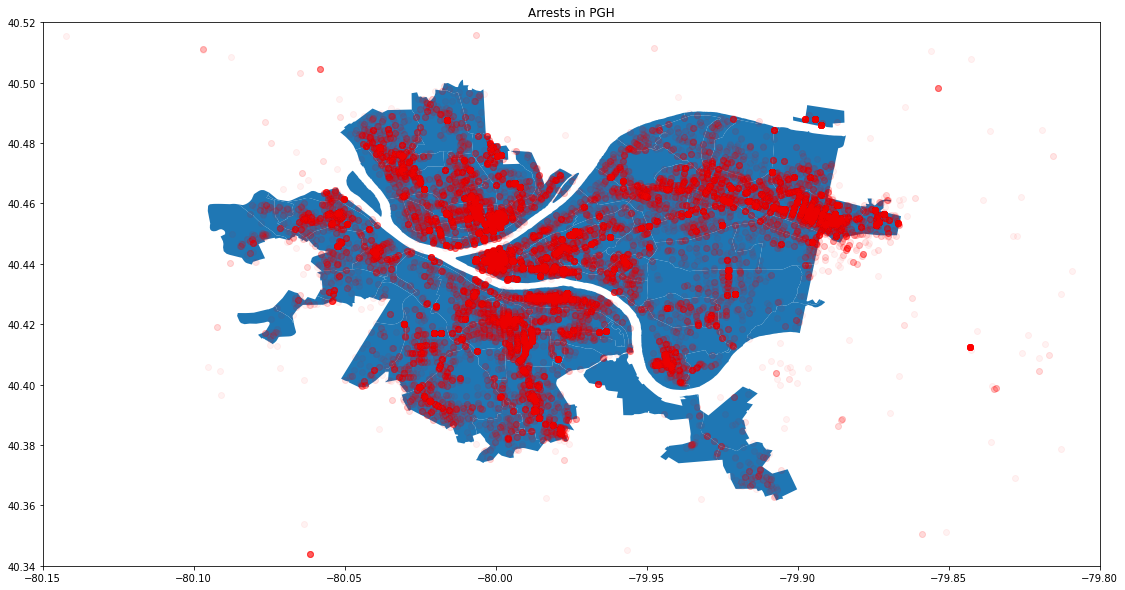

In [8]:
#import map of Pittsburgh
#source: https://spcgis-spc.hub.arcgis.com/datasets/city-of-pittsburgh-neighborhoods/explore?location=40.430850%2C-79.979850%2C12.73
arrests = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
pgh = gpd.read_file('./pgh/City_of_Pittsburgh_Neighborhoods.shp')
geometry = [Point(xy) for xy in zip(arrests['X'], arrests['Y'])]
geo_df = gpd.GeoDataFrame(arrests, geometry = geometry)
fig, ax = plt.subplots(figsize = (20,10))
pgh.plot(ax=ax)
plt.xlim([-80.15, -79.80])
plt.ylim([40.34,40.52])
ax.set_title('Arrests in PGH')
geo_df.plot(ax=ax, alpha = .05, color='red')
plt.show()

That's a lot of dots! But it looks like most crimes are focused around the point state park and expands outwards toward **East Hills, Carrick, and Brighton Heights.** **South East areas(Squirrel Hill to Lincoln Place) and West(Fairywood, East Carnegie)** seems to have the least amount of crime.

Let's further inspect the data...

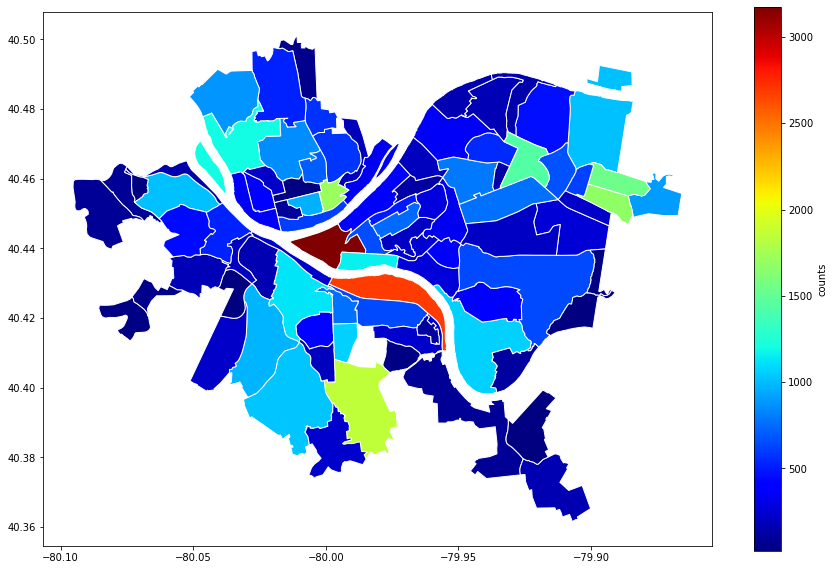

In [31]:
#Count number of crimes in each neighborhood and display as bar chart
tally = arrests['INCIDENTNEIGHBORHOOD'].value_counts().rename_axis('neighborhood').reset_index(name='counts')
tally.sort_values(by='counts', ascending=True)

pgh = gpd.read_file('./pgh/City_of_Pittsburgh_Neighborhoods.shp')
# Merging the two dataframes
crime_map = pgh.merge(tally, how='left', left_on='HOOD', right_on='neighborhood')

# looking to confirm if it merged correctly
crime_map[['HOOD','counts','geometry']].head()

crime_map.plot(column='counts', # set the data to be used for coloring
               cmap='jet',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "counts"}, # label the legend
               figsize=(15, 10),         # set the size
               )

That's much better! We should defintely avoid Central Business District, Southside, and Carrick. Let's rank all the neighborhoods now:

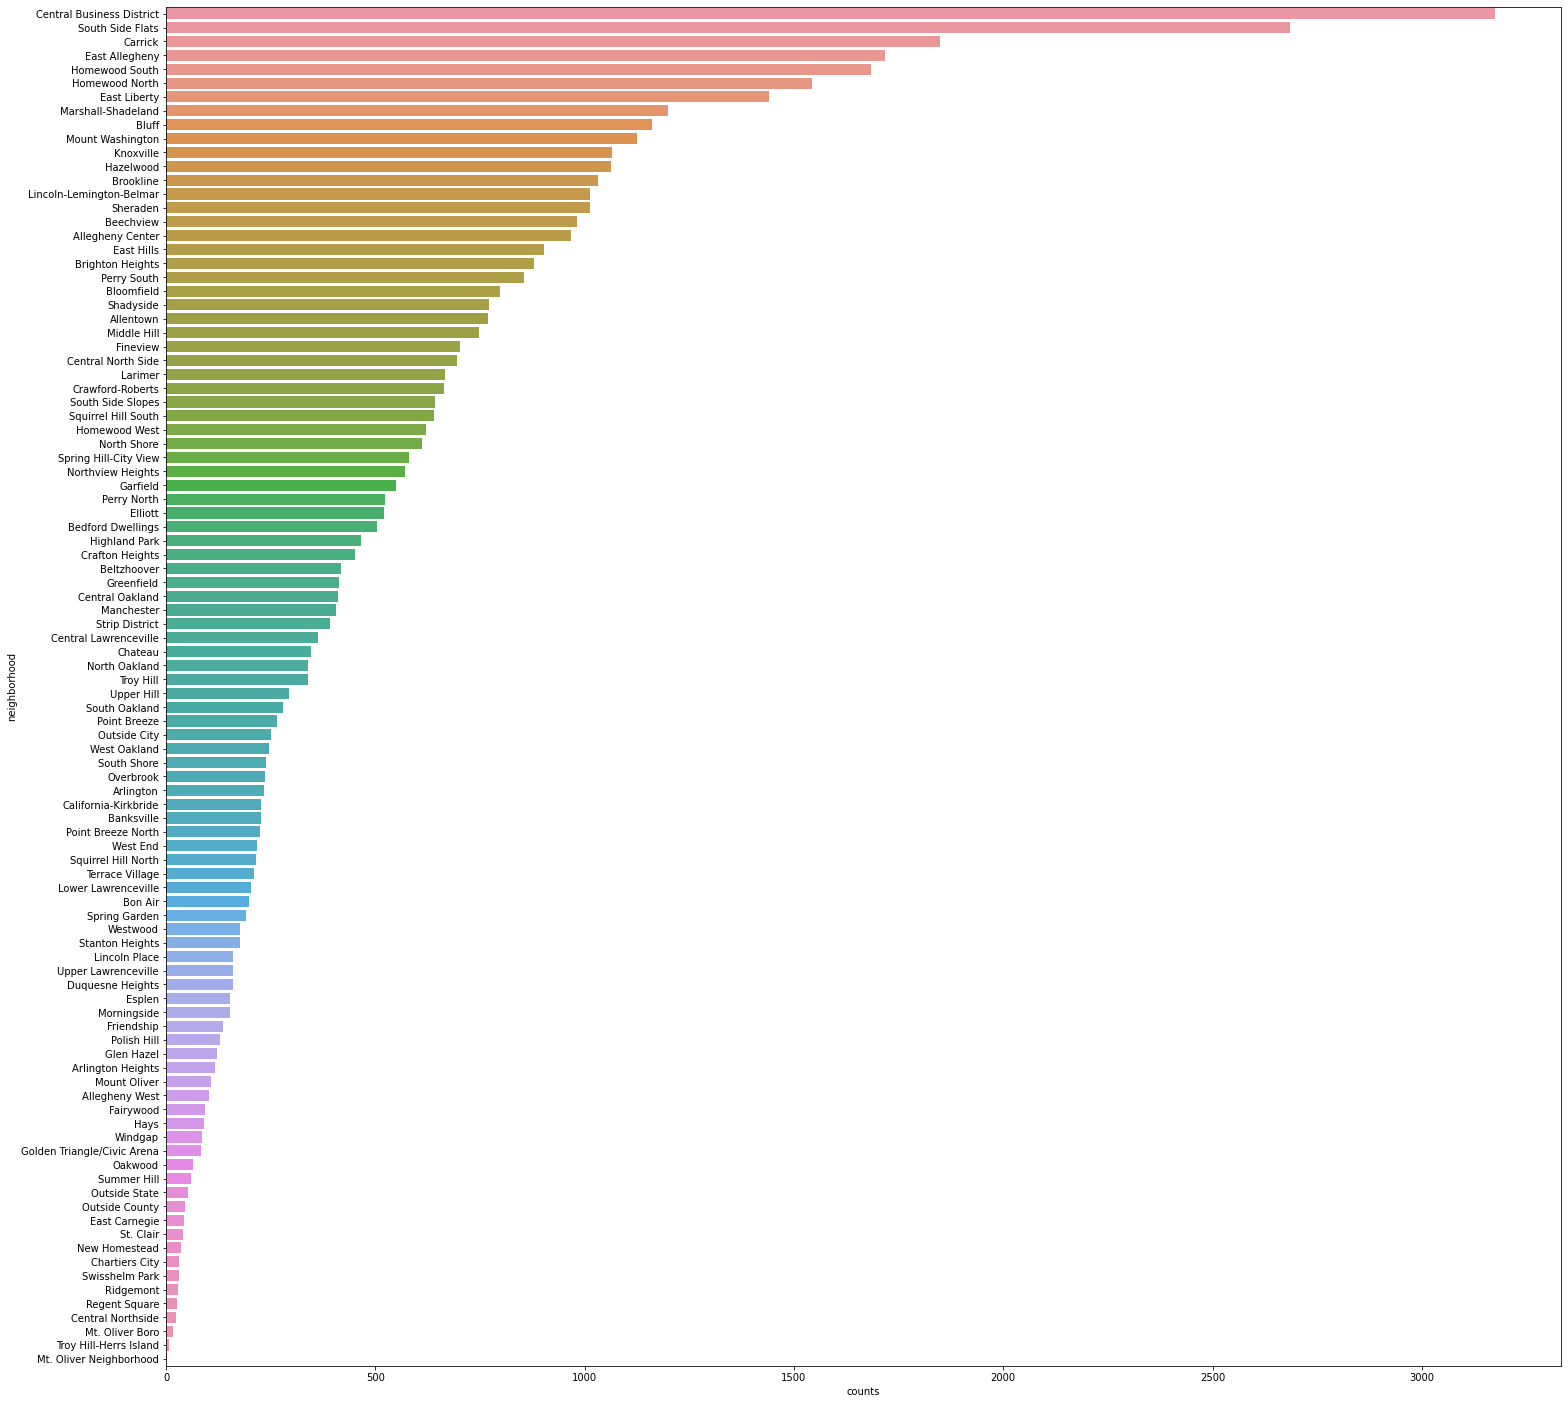

In [10]:
#print(tally.plot.bar(x='neighborhood', y='counts', figsize=(25,2), width=0.5, position=1, fontsize=14))
fig_dims = (25, 25)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "counts", 
            y = "neighborhood", 
            ax=ax, 
            data=tally, 
            orient="h", 
            order=tally.sort_values('counts', ascending = False).neighborhood)

And the prize for safest neighborhood goes to .... **Mt. Oliver Neighborhood**

In [11]:
print("Neighborhood with least amount of arrests: \n ",tally.nsmallest(5, ['counts']))

Neighborhood with least amount of arrests: 
                 neighborhood  counts
97  Mt. Oliver Neighborhood       2
96   Troy Hill-Herrs Island       6
95          Mt. Oliver Boro      17
94        Central Northside      23
93            Regent Square      27


#### Limitations
For this analysis, we assumed that the neighborhood with the least amount of arrests would be the safest; Since the data showed that arrests often occured when there were serious crimes, we assumed that less arrest meant less serious crimes in the neighborhood, and thus a safe neighborhood. However, another explanation could be that the neighborhood with the least amount of arrests has so much crime that the PGHPD does not send officers to condunct arrests, leading to lower arrests. Problems with the data like this might be a possibility considering the bias we saw previously in terms of race and gender; this might hinder our hypothesis that the neighborhood with the least amount of arrests would be the safest.</br>
Additionally, since people are mostly arrested serious felonies, the neighborhood with the lowest arrest rate might still have a lot of petty crimes, such a minor theft. This might hinder our judgment in calling **Mt. Oliver Neighborhood** the best neighborhood.

#### Conclusion
Based on the analysis I have provided above, I have determine that **Mt. Oliver Neighborhood** is the safest neighborhood, and thus select it as my candidate as the best neighborhood in Pittsburgh.